In [10]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt

In [11]:
GPS = pd.read_csv('static/csv/CFC GPS Data.csv')
IND = pd.read_csv('static/csv/CFC Individual Priority Areas.csv')
PHY = pd.read_csv('static/csv/CFC Physical Capability Data_.csv')
REC = pd.read_csv('static/csv/CFC Recovery status Data.csv')

# Exploration

In [12]:
GPS.describe()

,md_plus_code,md_minus_code,distance,distance_over_21,distance_over_24,distance_over_27,accel_decel_over_2_5,accel_decel_over_3_5,accel_decel_over_4_5,day_duration,peak_speed
count,862.000000,862.000000,862.000000,862.000000,862.000000,862.000000,862.000000,862.000000,862.000000,862.000000,862.000000
mean,3.489559,-3.482599,4348.397275,206.384127,87.730266,32.143318,93.532909,30.914458,9.413703,62.351265,24.327300
std,3.246978,3.239427,2841.399651,214.513552,103.481000,43.921496,64.593942,24.278089,8.803952,35.677410,10.914528
min,0.000000,-10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,-5.000000,2711.332083,40.067120,11.019218,1.239599,50.181008,14.031534,2.862817,45.343532,26.884825
50%,2.000000,-2.000000,4229.806525,140.624828,52.006816,14.919966,91.089483,27.642968,7.496299,67.636717,28.763600
75%,5.000000,-1.000000,6021.526515,292.186658,127.505919,43.802949,134.137148,44.412446,13.057154,85.325991,30.357408
max,10.000000,0.000000,15653.250800,1011.791940,543.629710,286.564259,326.736174,119.575568,43.411480,212.770547,32.937000


In [13]:
IND.describe()

,Priority
count,3.0
mean,2.0
std,1.0
min,1.0
25%,1.5
50%,2.0
75%,2.5
max,3.0


In [14]:
PHY.describe()

,benchmarkPct
count,9839.000000
mean,0.641032
std,0.194371
min,-0.200000
25%,0.490000
50%,0.648000
75%,0.772000
max,1.148000


In [15]:
REC.describe()

,value
count,5261.000000
mean,0.056069
std,0.192026
min,-1.000000
25%,0.000000
50%,0.000000
75%,0.063333
max,0.903226


# Targets

In [16]:
#Copy data and transforming columns
phy_data = PHY.copy()
ind_data = IND.copy()
rec_data = REC.copy()

phy_data["testDate"] = pd.to_datetime(phy_data["testDate"], format="%d/%m/%Y")
ind_data["Target set"] = pd.to_datetime(ind_data["Target set"], format="%d/%m/%Y")
ind_data["Review Date"] = pd.to_datetime(ind_data["Review Date"], format="%d/%m/%Y")
rec_data["sessionDate"] = pd.to_datetime(rec_data["sessionDate"], format="%d/%m/%Y")

In [17]:
# Target selection
priority_number = 3

target_area = 'max velocity'
target = 0.65 #trouver comment automatiser

In [18]:
#target informations
priority = ind_data[ind_data['Priority'] == priority_number]
target_type = priority['Category'].values[0]
priority_start = priority['Target set'].values[0]
priority_end = priority['Review Date'].values[0]

In [19]:
print(target_area)

max velocity


In [20]:
#Dataset Filtering

if target_type == "Performance":
    print("Performance")
    target_data = phy_data[(phy_data["quality"] == target_area.lower()) & (phy_data['testDate']>priority_start) & (phy_data['testDate']<priority_end)]
    target_data = target_data.dropna()
    target_data = target_data.sort_values(by=["testDate"])
    target_data["formatted_date"] = target_data["testDate"].dt.strftime("%-d %b %Y")
elif target_type == "Recovery" :
    print("Recovery")
    target_data = rec_data[(rec_data["category"]== target_area.lower()) & (rec_data['sessionDate']>priority_start) & (rec_data['sessionDate']<priority_end)]
    target_data = target_data.dropna()
    target_data = target_data.sort_values(by=["testDate"])
    target_data["formatted_date"] = target_data["testDate"].dt.strftime("%-d %b %Y")
else : 
    print('wtf')
    
print(len(target_data))
target_data.head()

Performance
10


,testDate,expression,movement,quality,benchmarkPct,formatted_date
113,2025-03-08,isometric,sprint,max velocity,0.7700,8 Mar 2025
5702,2025-03-08,dynamic,sprint,max velocity,0.6495,8 Mar 2025
5511,2025-03-09,dynamic,sprint,max velocity,0.6495,9 Mar 2025
9076,2025-03-09,isometric,sprint,max velocity,0.7700,9 Mar 2025
5244,2025-03-10,isometric,sprint,max velocity,0.7700,10 Mar 2025


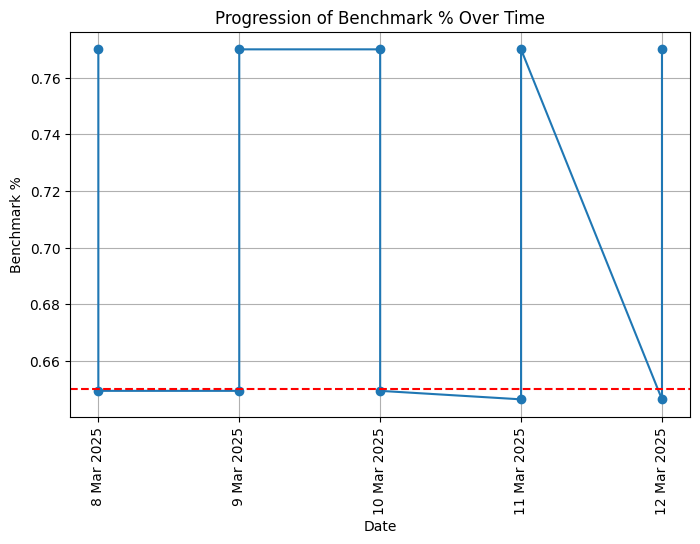

obj : 0.6465
max : 0.77
avg : 0.70915
suc : True


In [21]:
#Ploting
plt.figure(figsize=(8, 5))
plt.plot(target_data["formatted_date"], target_data["benchmarkPct"], marker='o', linestyle='-')
plt.axhline(y=target, color='red', linestyle='--', label='Objective')
plt.xlabel("Date")
plt.ylabel("Benchmark %")
plt.xticks(rotation=90)
plt.title("Progression of Benchmark % Over Time")
plt.grid()
plt.show()

print('obj :' ,target_data["benchmarkPct"].min())
print('max :' ,target_data["benchmarkPct"].max())
print('avg :' ,target_data["benchmarkPct"].mean())
print('suc :' ,target_data["benchmarkPct"].max()> target)

In [22]:
print(phy_data['movement'].unique())
t = phy_data[phy_data['movement']=="sprint"]
t['quality'].unique()




['upper body' 'agility' 'jump' 'sprint']


array(['acceleration', 'max velocity'], dtype=object)